The idea is to create a machine learning model that can predict if an observation is a real exoplanet or not. The data was collected by the Kepler mission that revealed thousands of planets out of our Solar System. The purpose of this project is to build an algorithm to find planets out of the solar system in [NASA Exoplanet Dataset](https://www.kaggle.com/datasets/arashnic/exoplanets) stored in `exoplanets.zip`. I use classic machine learning algorithms and TensorFlow to identify real exoplanets. 



In [ ]:
#Import libraries
import numpy as np
import scipy.optimize as opt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Read data using pandas

In [ ]:
df = pd.read_csv("exoplanets.zip") 
df.sample(5) 

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3506,6347299,K00661.01,Kepler-204 b,CONFIRMED,CANDIDATE,1.0,0,0,0,0,...,-117.0,4.270,0.156,-0.104,1.198,0.178,-0.198,285.34720,41.761921,13.909
3552,7368664,K00614.01,Kepler-434 b,CONFIRMED,CANDIDATE,1.0,0,0,0,0,...,-80.0,4.218,0.143,-0.117,1.424,0.249,-0.249,293.58636,42.928909,14.517
202,7135852,K00875.01,NaN,CANDIDATE,CANDIDATE,1.0,0,0,0,0,...,-259.0,4.747,0.105,-0.094,0.517,0.114,-0.114,296.69394,42.626110,15.692
9,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.0,0,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
9285,10535991,K08024.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,0,1,1,...,-179.0,4.554,0.036,-0.192,0.846,0.235,-0.078,292.22760,47.746262,15.767


# Rename columns to make them easier to use

In [ ]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpperUnc_days',
'koi_period_err2':'OrbitalPeriodLowerUnc_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc_BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc_BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDurationUpperUnc_hrs',
'koi_duration_err2':'TransitDurationLowerUnc_hrs',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepthUpperUnc_ppm',
'koi_depth_err2':'TransitDepthLowerUnc_ppm',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc_Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc_Earthradii',
'koi_teq':'EquilibriumTemperatureK',
'koi_teq_err1':'EquilibriumTemperatureUpperUncK',
'koi_teq_err2':'EquilibriumTemperatureLowerUncK',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc_Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc_Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperatureK',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUncK',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUncK',
'koi_slogg':'StellarSurfaceGravity_log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc_Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc_Solarradii',
'ra':'RA_decimaldegrees',
'dec':'Dec_decimaldegrees',
'koi_kepmag':'Kepler-band_mag'
})
df.head().T

,0,1,2,3,4
KepID,10797460,10797460,10811496,10848459,10854555
KOIName,K00752.01,K00752.02,K00753.01,K00754.01,K00755.01
KeplerName,Kepler-227 b,Kepler-227 c,NaN,NaN,Kepler-664 b
ExoplanetArchiveDisposition,CONFIRMED,CONFIRMED,CANDIDATE,FALSE POSITIVE,CONFIRMED
DispositionUsingKeplerData,CANDIDATE,CANDIDATE,CANDIDATE,FALSE POSITIVE,CANDIDATE
DispositionScore,1.0,0.969,0.0,0.0,1.0
NotTransit-LikeFalsePositiveFlag,0,0,0,0,0
koi_fpflag_ss,0,0,0,1,0
CentroidOffsetFalsePositiveFlag,0,0,0,0,0
EphemerisMatchIndicatesContaminationFalsePositiveFlag,0,0,0,0,0


**The dataset contains some columns that are not numeric. To work with these columns, they must be encoded into numeric forms. To do this, I use a map().**

In [ ]:
df.DispositionUsingKeplerData = df.DispositionUsingKeplerData.map({'FALSE POSITIVE': 0, 'CANDIDATE': 1}) 
df.ExoplanetArchiveDisposition = df.ExoplanetArchiveDisposition.map({'CONFIRMED': 2, 'CANDIDATE': 1, 'FALSE POSITIVE': 0}) 
df.TCEDeliver = df.TCEDeliver.map({'q1_q17_dr25_tce': 0, 'q1_q16_tce': 1, 'q1_q17_dr24_tce': 2}) 

# Rename targets

In [ ]:
df = df.rename(columns={'DispositionUsingKeplerData': 'ExoplanetCandidate', 'ExoplanetArchiveDisposition': 'ExoplanetConfirmed'})

# Remove extra columns

In [ ]:
df = df.drop(columns=['KeplerName', 'KOIName', 'EquilibriumTemperatureUpperUncK', 'KepID', 'EquilibriumTemperatureLowerUncK']) 

# Replace NaN values with a specified value

In [ ]:
df = df.fillna(method="ffill") 

# I need to know what type of data I am working with before I can work with dataframe, so I check it using the `dtypes`.

In [ ]:
df.dtypes

ExoplanetConfirmed                                         int64
ExoplanetCandidate                                         int64
DispositionScore                                         float64
NotTransit-LikeFalsePositiveFlag                           int64
koi_fpflag_ss                                              int64
CentroidOffsetFalsePositiveFlag                            int64
EphemerisMatchIndicatesContaminationFalsePositiveFlag      int64
OrbitalPeriod_days                                       float64
OrbitalPeriodUpperUnc_days                               float64
OrbitalPeriodLowerUnc_days                               float64
TransitEpoch_BKJD                                        float64
TransitEpochUpperUnc_BKJD                                float64
TransitEpochLowerUnc_BKJD                                float64
ImpactParamete                                           float64
ImpactParameterUpperUnc                                  float64
ImpactParameterLowerUnc  

**In the dataframe, there are 9564 records with 44 columns.**

In [ ]:
df.shape

(9564, 44)

**I am going to test if there are NaN values in dataframe**

In [ ]:
df.isnull().any().any()

False

**There are no NaN values**

# The next step is to examine classic machine learning algorithms and TensorFlow.

## I first split the DataFrame into X (data) and Y (labels), where:

**Target(label): `ExoplanetConfirmed`, with three class:**

*   CONFIRMED: 2 

*   CANDIDATE: 1
*   FALSE POSITIVE: 0

In [ ]:
X = df.drop(['ExoplanetConfirmed'], axis=1)
y = df['ExoplanetConfirmed']  

## Using a train-test split, I split X and Y into train and test data to evaluate the machine learning algorithm's performance.

*   Train Dataset: Used to fit the machine learning model.
*   Test Dataset: Used to evaluate the fit machine learning model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1. Classic machine learning algorithms

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### KNeighborsClassifier

**Using X_train and y_train, train a KNeighborsClassifier with default parameters and `n_neighbors=12`.**

In [ ]:
KNClf = KNeighborsClassifier(n_neighbors = 12)  # KNClf= KNeighborsClassifier
KNClf.fit(X_train_scaled, y_train) 

KNeighborsClassifier(n_neighbors=12)

#### Model prediction

In [ ]:
Model_Prediction_knn = KNClf.predict(X_test_scaled)
Model_Prediction_knn

array([1, 1, 2, ..., 0, 2, 2])

#### Model Accuracy

In [ ]:
print('Accuracy of KNeighborsClassifier on train set: {:.3f}' .format(KNClf.score(X_train_scaled, y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.3f}' .format(KNClf.score(X_test_scaled, y_test)))

Accuracy of KNeighborsClassifier on train set: 0.885
Accuracy of KNeighborsClassifier on test set: 0.860


**I predicted the correct class on `86%` of the samples in X_test.**

**Is n_neighbors = 12 the best value? Yes, because:**

In [ ]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled, y_train)
    yhat = neigh.predict(X_test_scaled)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.83437892, 0.82768716, 0.83479716, 0.84023421, 0.84232539,
       0.85069009, 0.85152656, 0.85487244, 0.85570891, 0.85863655,
       0.85989126, 0.86030949, 0.85780008, 0.8531995 ])

**To better understand, I visualize previous cell to see better the relationship between Accuracy and Number of Neighbors(K).**

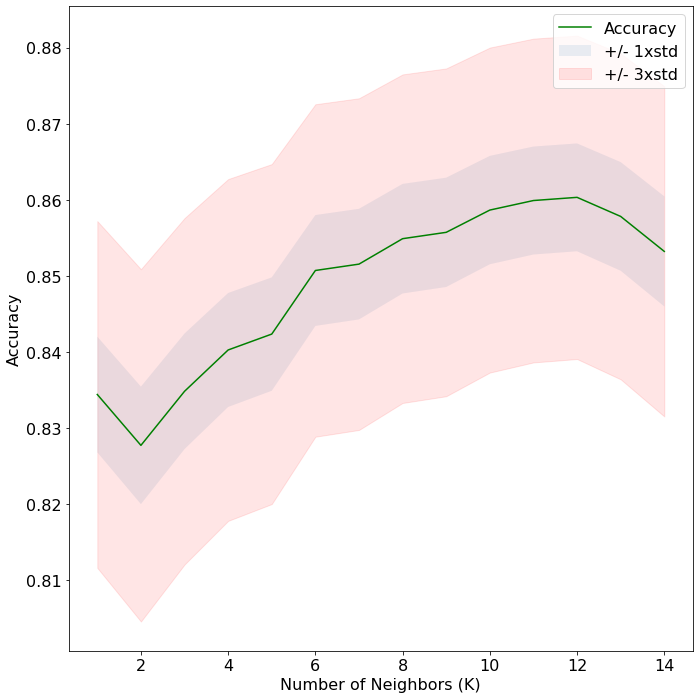

In [ ]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='red')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print("The best accuracy is {:.3f}" .format(mean_acc.max()), "with k =", mean_acc.argmax()+ 1)

The best accuracy is 0.860 with k = 12


In [ ]:
print(classification_report(y_test, Model_Prediction_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1190
           1       0.77      0.64      0.70       601
           2       0.69      0.80      0.74       600

    accuracy                           0.86      2391
   macro avg       0.82      0.81      0.81      2391
weighted avg       0.86      0.86      0.86      2391



### DecisionTreeClassifier

**Using X_train and y_train, train a DecisionTreeClassifier with `default parameters` and `random_state=0`.**

In [ ]:
DTClf = DecisionTreeClassifier(random_state = 0)  #DTClf = Decision Tree Classifier
DTClf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
Model_Prediction = DTClf.predict(X_test)

**In order to show easily the differences between `model-based prediction` and `real values`, I create a dataframe.**

In [ ]:
d = {'real or true values(y_test)': y_test, 'Model_Prediction': Model_Prediction}
dfC = pd.DataFrame(data=d)
dfC.head(10)

,real or true values(y_test),Model_Prediction
9004,1,1
5028,1,1
1142,2,1
1355,0,0
8740,0,0
1432,2,2
1770,2,2
3465,0,0
3999,0,0
5418,0,0


#### Model Accuracy

In [ ]:
print('Accuracy of Decision Tree classifier on train set: {:.3f}' .format(DTClf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}' .format(DTClf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on train set: 1.000
Accuracy of Decision Tree classifier on test set: 0.875


**I predicted the correct class on `87.5%` of the samples in X_test.**

### RandomForestClassifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
RFClf = RandomForestClassifier(n_estimators=300, criterion='entropy', min_samples_leaf=2, random_state=0) # RFClf = RandomForestClassifier
RFClf.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       n_estimators=300, random_state=0)

#### Model Accuracy

In [ ]:
print('Accuracy of RandomForestClassifier on train set: {:.3f}' .format(RFClf.score(X_train, y_train)))
print('Accuracy of RandomForestClassifier on test set: {:.3f}' .format(RFClf.score(X_test, y_test)))

Accuracy of RandomForestClassifier on train set: 0.998
Accuracy of RandomForestClassifier on test set: 0.920


**I predicted the correct class on `92%` of the samples in X_test.**

### GradientBoostingClassifier

In [ ]:
GBClf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0,
     max_depth=1, random_state=0) # ABClf = AdaBoostClassifier
GBClf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=300,
                           random_state=0)

#### Model Accuracy

In [ ]:
print('Accuracy of GradientBoostingClassifier on train set: {:.3f}' .format(GBClf.score(X_train, y_train)))
print('Accuracy of GradientBoostingClassifier on test set: {:.3f}' .format(GBClf.score(X_test, y_test)))

Accuracy of GradientBoostingClassifier on train set: 0.944
Accuracy of GradientBoostingClassifier on test set: 0.918


**I predicted the correct class on `91.8%` of the samples in X_test.**

### Neural_Network.MLPClassifier

In [ ]:
NNClf = MLPClassifier(hidden_layer_sizes=(300,), activation='relu', random_state=0, max_iter=300)
NNClf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(300,), max_iter=300, random_state=0)

#### Model Accuracy

In [ ]:
print('Accuracy of MLPClassifier on train set: {:.3f}' .format(NNClf.score(X_train_scaled, y_train)))
print('Accuracy of MLPClassifier on test set: {:.3f}' .format(NNClf.score(X_test_scaled, y_test)))

Accuracy of MLPClassifier on train set: 0.909
Accuracy of MLPClassifier on test set: 0.902


**I predicted the correct class on `90.2%` of the samples in X_test.**

### VotingClassifier

**Combining three algorithms, Random Forest Classifier, GradientBoostingClassifier, and MLPClassifier, I achieve high accuracy. For this, I use `VotingClassifier`.**

In [ ]:
eclf1 = VotingClassifier(estimators=[
        ('gb', GBClf), ('rf', RFClf), ('nn', NNClf)], voting='hard') 
eclf1.fit(X_train_scaled, y_train) 

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=1,
                                                         n_estimators=300,
                                                         random_state=0)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     min_samples_leaf=2,
                                                     n_estimators=300,
                                                     random_state=0)),
                             ('nn',
                              MLPClassifier(hidden_layer_sizes=(300,),
                                            max_iter=300, random_state=0))])

#### Model Accuracy

In [ ]:
print('Accuracy of VotingClassifier on train set: {:.3f}' .format(eclf1.score(X_train_scaled, y_train)))
print('Accuracy of VotingClassifier on test set: {:.3f}' .format(eclf1.score(X_test_scaled, y_test)))

Accuracy of VotingClassifier on train set: 0.957
Accuracy of VotingClassifier on test set: 0.924


**On `92.4%` of the samples in X_test, I correctly predicted the class.**

### As a data frame, model accuracies are as follows:

In [ ]:
d = {'Model': ['VotingClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'Neural_Network.MLPClassifier', 
               'DecisionTreeClassifier', 'KNeighborsClassifier'], 'Accuracy': [92.4, 92, 91.8, 90.2, 87.5, 86]} 
dfC = pd.DataFrame(data=d)
dfC

,Model,Accuracy
0,VotingClassifier,92.4
1,RandomForestClassifier,92.0
2,GradientBoostingClassifier,91.8
3,Neural_Network.MLPClassifier,90.2
4,DecisionTreeClassifier,87.5
5,KNeighborsClassifier,86.0


**For the `ROC Curve`, the ideal curve is close to the top left: I want a classifier that produces a high recall while keeping a low false positive rate. Also, for `Precision_Recall`, the closer a curve stays to the upper right corner, the better the classifier. A point at the upper right means high precision and high recall for the same threshold. Here I plot `ROC Curves` that reflect ROC scores in comparison charts. This provides us with a better understanding of which algorithm works best for our dataset.**

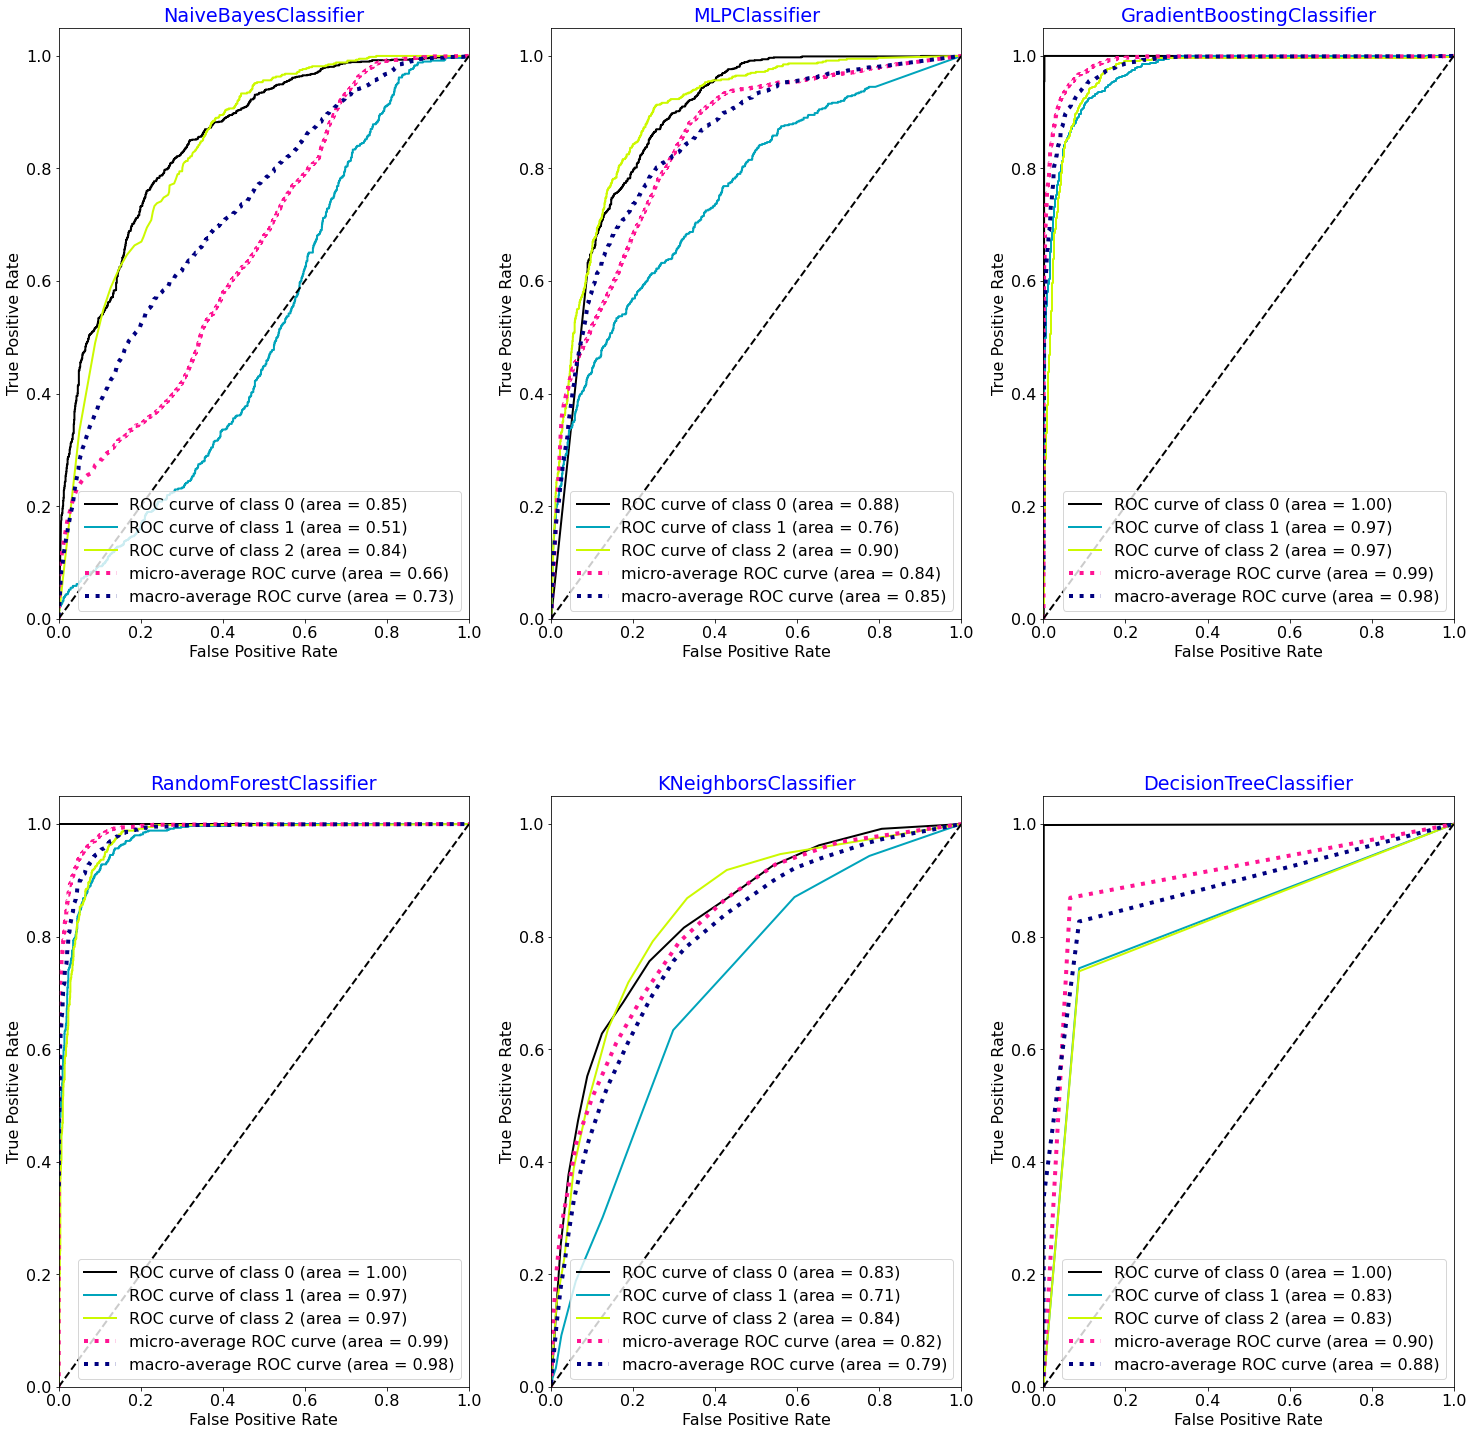

In [ ]:
import scikitplot as skplt
NBC = GaussianNB() 
NNC = MLPClassifier(hidden_layer_sizes=(300,), activation='relu', random_state=0, max_iter=300) 
GBC = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)
RFC = RandomForestClassifier(n_estimators=300, criterion='entropy', min_samples_leaf=2, random_state=0)
KNC = KNeighborsClassifier(n_neighbors = 12) 
DTC = DecisionTreeClassifier()

classifiers = [NBC, NNC, GBC, RFC, KNC, DTC] 
title = ['NaiveBayesClassifier','MLPClassifier','GradientBoostingClassifier','RandomForestClassifier',
         'KNeighborsClassifier', 'DecisionTreeClassifier']

for cls in classifiers:
    cls.fit(X_train, y_train)

plt.figure(figsize=(25,25))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.3)

for i in range(6):

    col, row = i%3,i//3
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_color('blue')

    model = classifiers[i]
    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), ax=ax, title=title[i])

plt.show()

**Additionally, I plot the `Precision-Recall Curve` and `Confusion Matrix` to determine which algorithms are best for this dataset in general.**

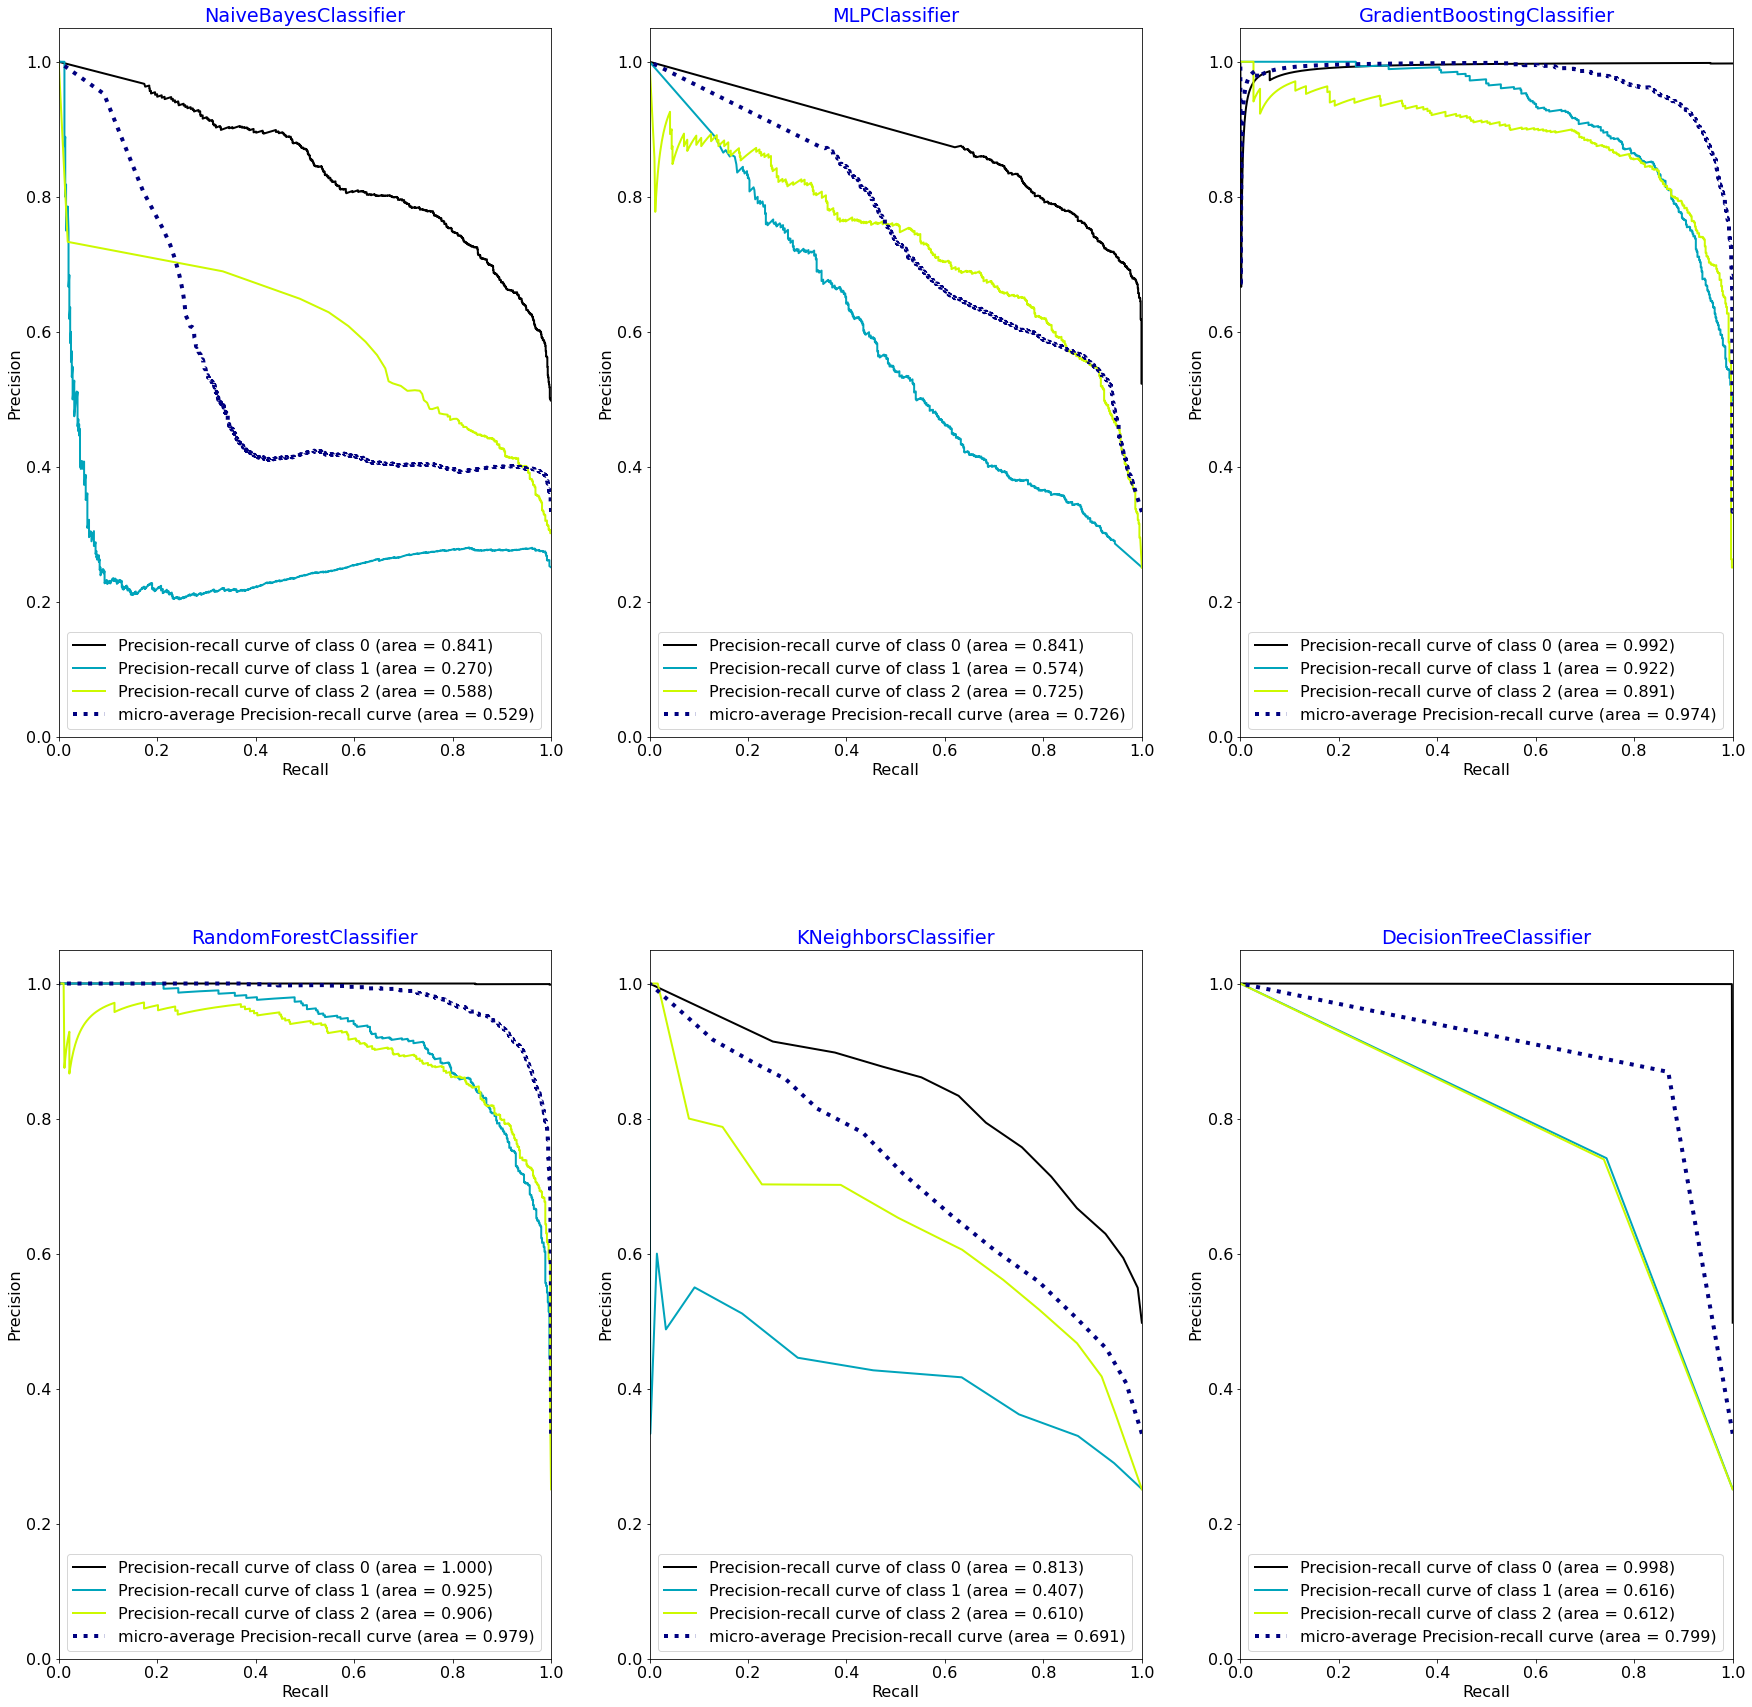

In [ ]:
plt.figure(figsize=(30,30))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.3)

for i in range(6):

    col, row = i%3,i//3
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_color('blue')

    model = classifiers[i]
    skplt.metrics.plot_precision_recall(y_test, model.predict_proba(X_test), ax=ax, title=title[i])

plt.show()

**Confusion Matrix**

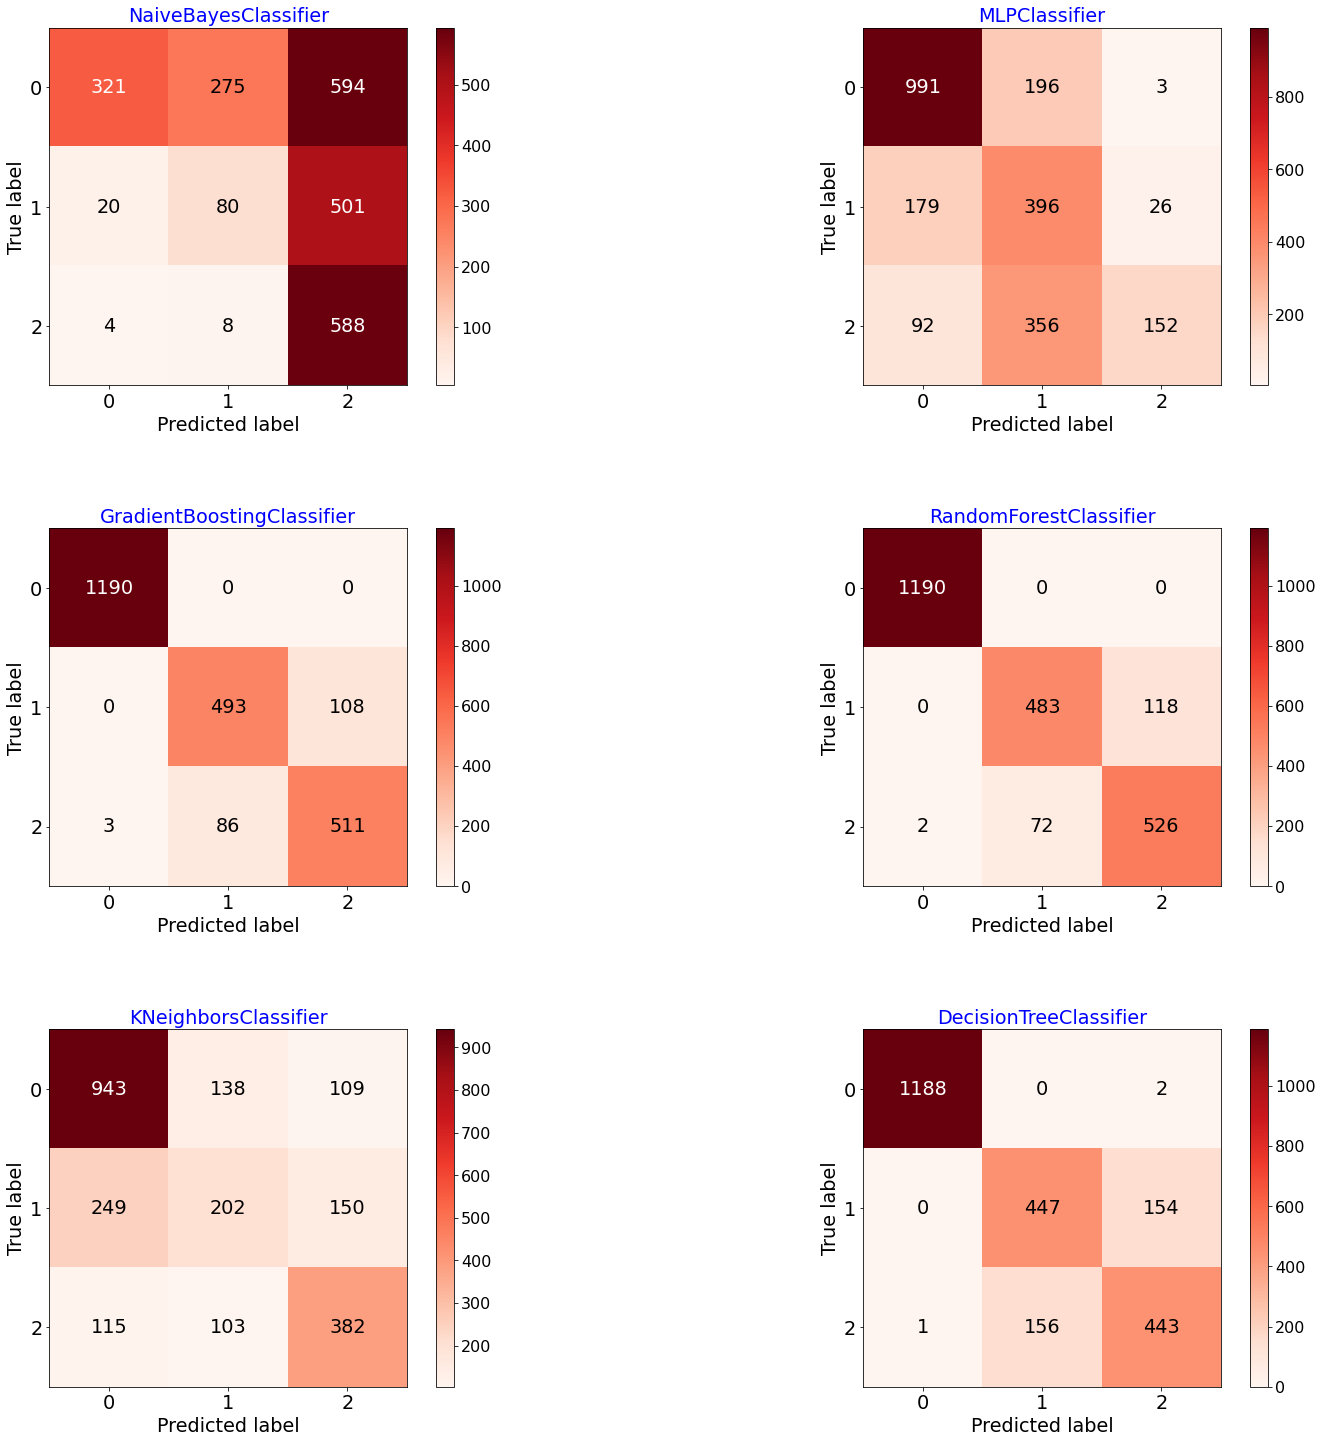

In [ ]:
plt.figure(figsize=(25, 25))
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.4)


for i in range(6):

    col, row = i%2,i//2
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_color('blue')

    model = classifiers[i]
    skplt.metrics.plot_confusion_matrix(y_test, model.predict(X_test), ax=ax, cmap='Reds', title=title[i], text_fontsize='large')

plt.show()

## 2. TensorFlow

The first thing I do is train a simple Neural Network using TensorFlow, and then plot accuracy and loss graphs on the training and validation datasets to find a balance between the model that is underfitting and one that is overfitting, resulting in a model with a good fit. I first need to convert the train and test data into a TensorFlow tensor. 

### To convert DataFrame to a tensor, I use `tf.convert_to_tensor`

In [ ]:
tf.convert_to_tensor(X_train)

<tf.Tensor: shape=(7173, 43), dtype=float64, numpy=
array([[1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 3.0041751e+02,
        4.5605518e+01, 1.5017000e+01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.9441245e+02,
        4.5130852e+01, 1.3794000e+01],
       [1.0000000e+00, 9.8500000e-01, 0.0000000e+00, ..., 2.9024103e+02,
        3.9968010e+01, 1.5614000e+01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.9754337e+02,
        4.1947979e+01, 1.3998000e+01],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 2.8420966e+02,
        4.5258080e+01, 1.5977000e+01],
       [0.0000000e+00, 2.2800000e-01, 1.0000000e+00, ..., 2.9532828e+02,
        3.8847500e+01, 1.0924000e+01]])>

In [ ]:
tf.convert_to_tensor(X_test)

<tf.Tensor: shape=(2391, 43), dtype=float64, numpy=
array([[  1.      ,   1.      ,   0.      , ..., 294.6015  ,  43.159935,
         13.583   ],
       [  1.      ,   1.      ,   0.      , ..., 286.54041 ,  38.3326  ,
         14.634   ],
       [  1.      ,   1.      ,   0.      , ..., 298.60788 ,  46.453678,
         14.548   ],
       ...,
       [  0.      ,   0.      ,   0.      , ..., 289.5249  ,  51.172005,
         13.181   ],
       [  1.      ,   1.      ,   0.      , ..., 284.73904 ,  49.5984  ,
         12.324   ],
       [  1.      ,   0.996   ,   0.      , ..., 293.08447 ,  48.57539 ,
         15.451   ]])>

### Normalize X_train

In [ ]:
X_train_scaled = tf.keras.layers.Normalization(axis=-1)
X_train_scaled.adapt(X_train)

### Building a simple neural network model

The compile function takes three arguments: optimizer, loss, and metrics.


*   **Optimizer**: These are certain algorithms that are used to change the attributes of the neural network to decrease the loss rate.
*   **Loss**: This is used to compute the quantity that a model should seek to minimize during training.


*   **Metrics**: This is used to judge the performance of the model.





**In order to find the best result, I start with simple models and then gradually make them more complex.**

**Test models with 10, 16, 32, 64 neurons, with 50, 100, and 200 batch sizes**

## Model 1: one hidden layer with 10 neurons

In [ ]:
def get_basic_model():
  model = tf.keras.Sequential([
    X_train_scaled,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax) 
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model
model = get_basic_model()
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test)) 

Epoch 1/500
225/225 [==============================] - 1s 3ms/step - loss: 0.8280 - accuracy: 0.6557 - val_loss: 0.5412 - val_accuracy: 0.7909
Epoch 2/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4383 - accuracy: 0.8301 - val_loss: 0.3785 - val_accuracy: 0.8490
Epoch 3/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8652 - val_loss: 0.3112 - val_accuracy: 0.8716
Epoch 4/500
225/225 [==============================] - 1s 2ms/step - loss: 0.2916 - accuracy: 0.8812 - val_loss: 0.2781 - val_accuracy: 0.8804
Epoch 5/500
225/225 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.8894 - val_loss: 0.2591 - val_accuracy: 0.8967
Epoch 6/500
225/225 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.8939 - val_loss: 0.2475 - val_accuracy: 0.8980
Epoch 7/500
225/225 [==============================] - 1s 3ms/step - loss: 0.2405 - accuracy: 0.8954 - val_loss: 0.2408 - val_accuracy: 0.9000

### Evaluate the model

I create plots from the collected history data.

*   A plot of accuracy on the training and validation datasets over training epochs.
*   A plot of loss on the training and validation datasets over training epochs.




75/75 - 0s - loss: 0.3175 - accuracy: 0.9076 - 97ms/epoch - 1ms/step


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


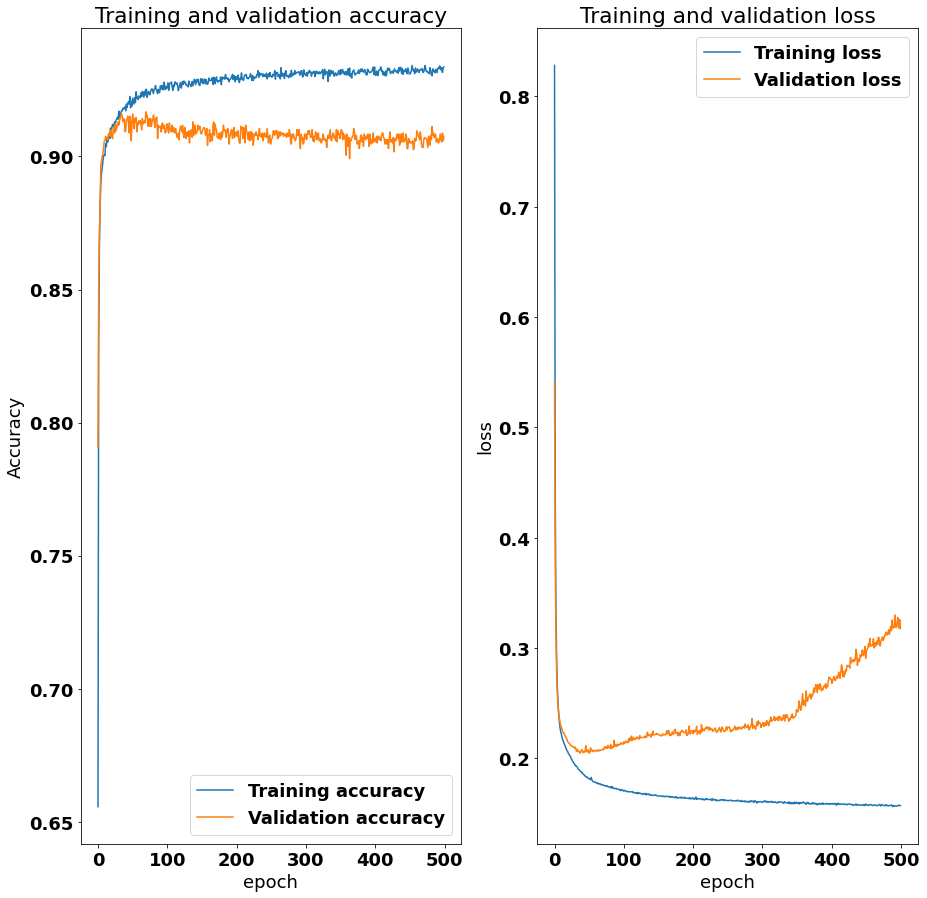

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(figsize=(15,15))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label = 'Validation accuracy') 
ax1.set_title("Training and validation accuracy")
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_title("Training and validation loss")
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(loc='upper right')
#To check the network accuracy on test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

According to the plot of loss, validation loss is decreasing before the 50th epoch, so the model
is underfitting. However, after the 50th epoch, validation loss is increasing, meaning the model
is overfitting. Around the 50th epoch, when the model is either perfectly fitted or in a local
minimum, the neural network model achieved an accuracy of 91%.
The goal of Deep Learning training is to find a balance between a model that is underfitting
and one that is overfitting, resulting in a model with a good fit. I found an optimum where the
change in the slope of loss is around the 50th epoch, as shown above. At that point, the training
process can be stopped. Since the codes for other models are the same, I just show the results.


## Model 2: one hidden layer with 10 neurons and batch_size=50

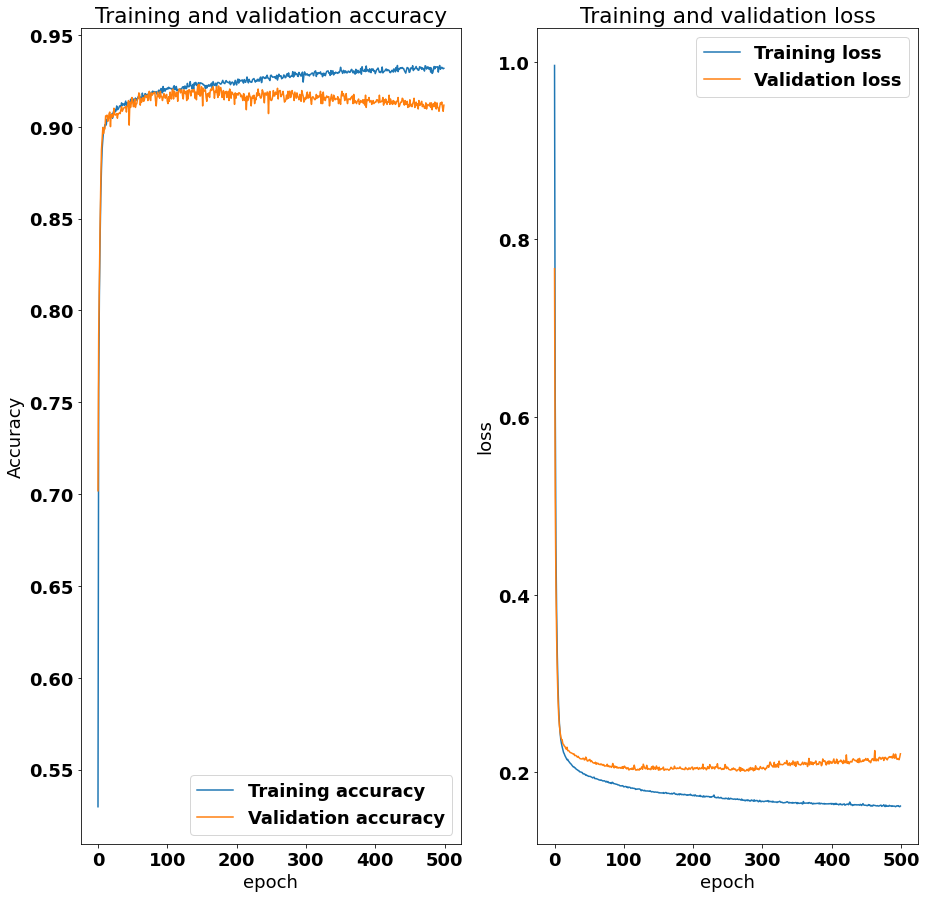

In [ ]:
image = cv2.imread('1.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

## Model 3: one hidden layer with 10 neurons and batch_size=100

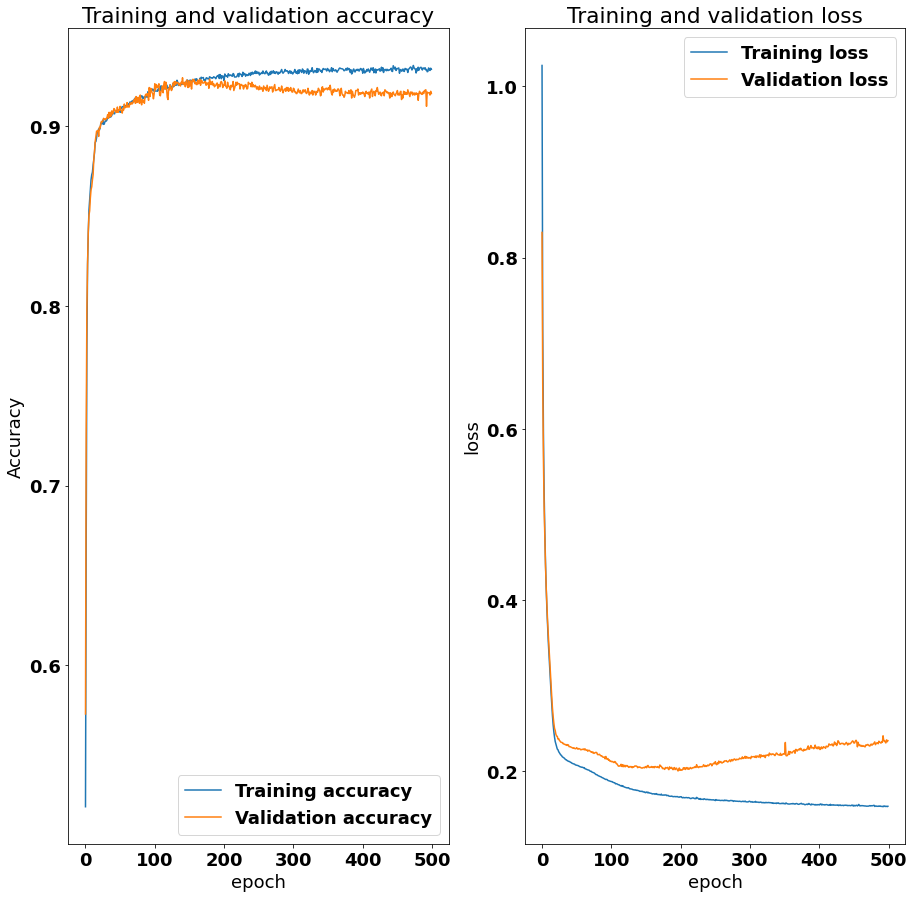

In [ ]:
image = cv2.imread('2.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

## Model 4: one hidden layer with 10 neurons and batch_size=200

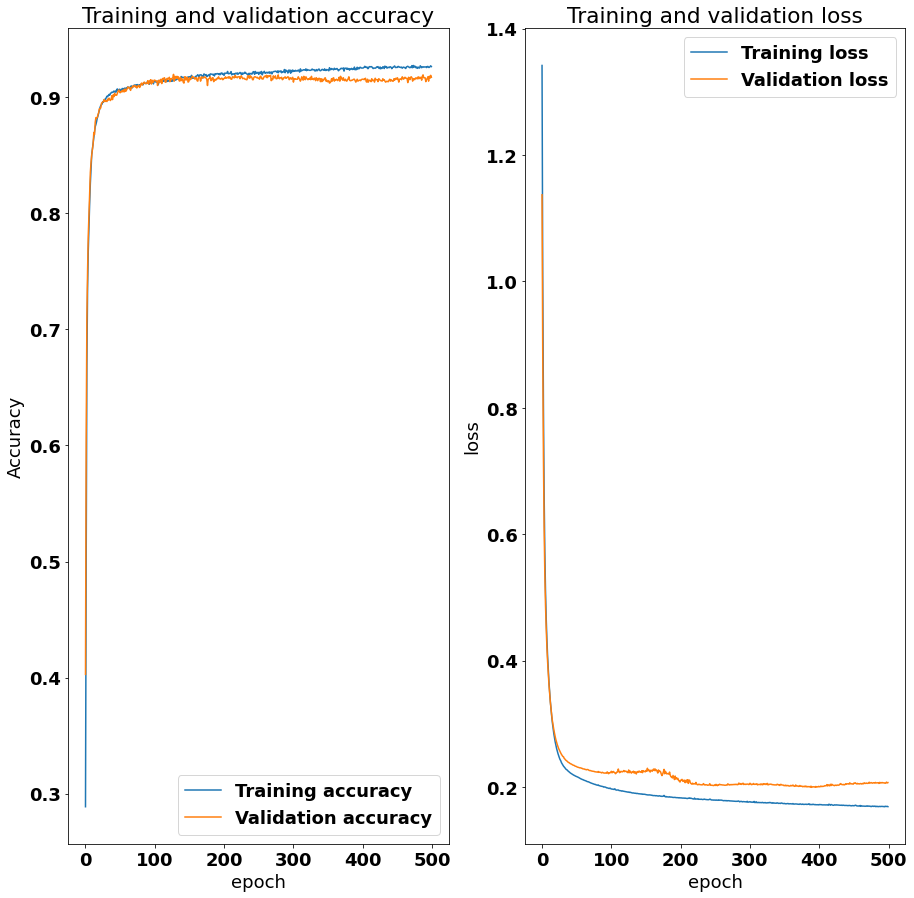

In [ ]:
image = cv2.imread('3.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

## Model 5: one hidden layer with 16 neurons

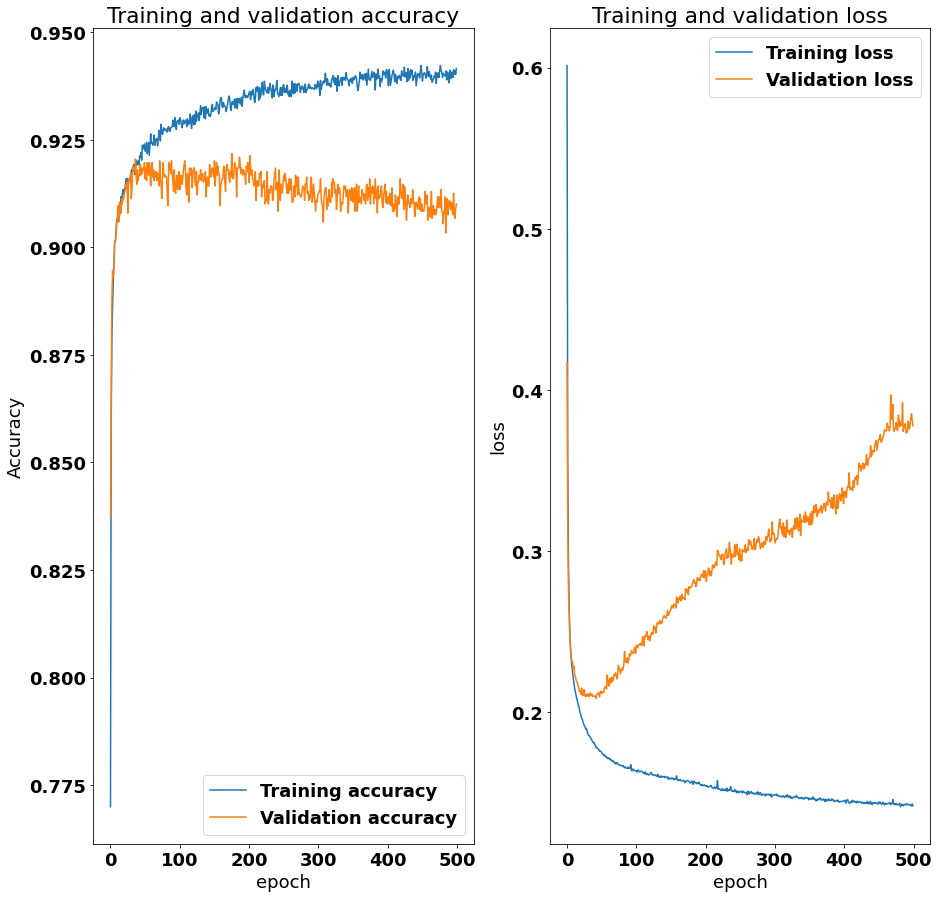

In [ ]:
image = cv2.imread('4.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

50th epoch ---> 92%

## Model 6: one hidden layer with 16 neurons and batch_size=50

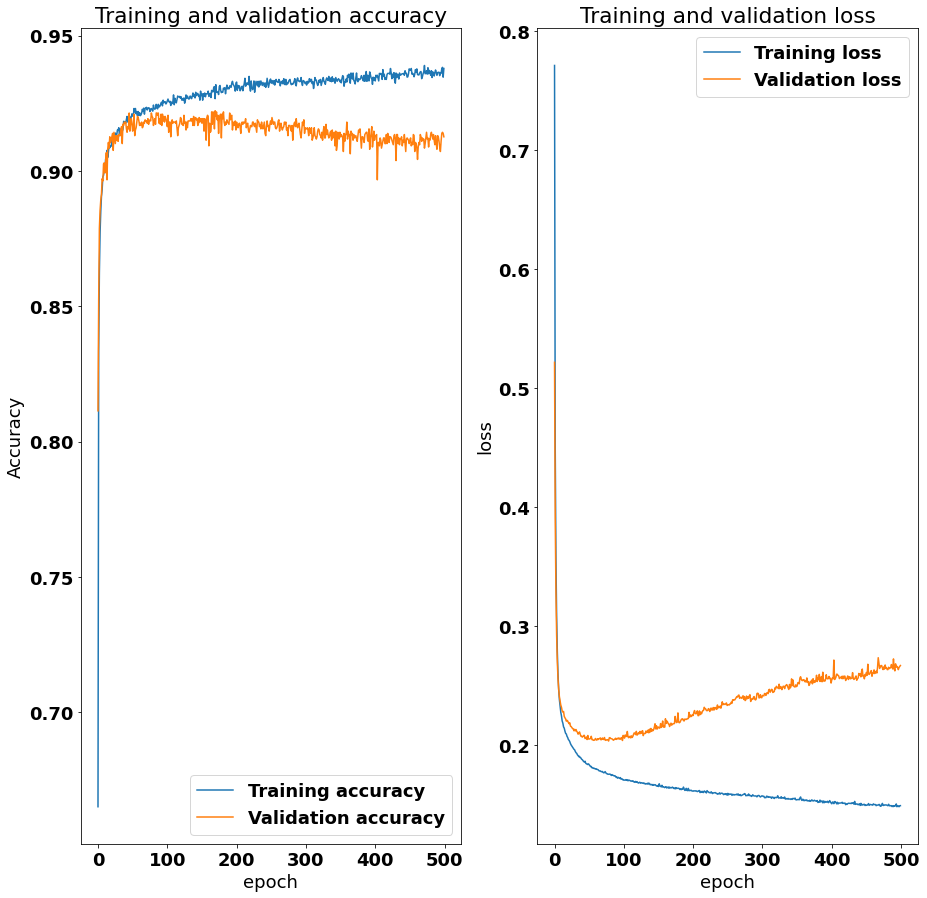

In [ ]:
image = cv2.imread('6.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

85th epoch ---> 92.1%

## Model 7: one hidden layer with 16 neurons and batch_size=100

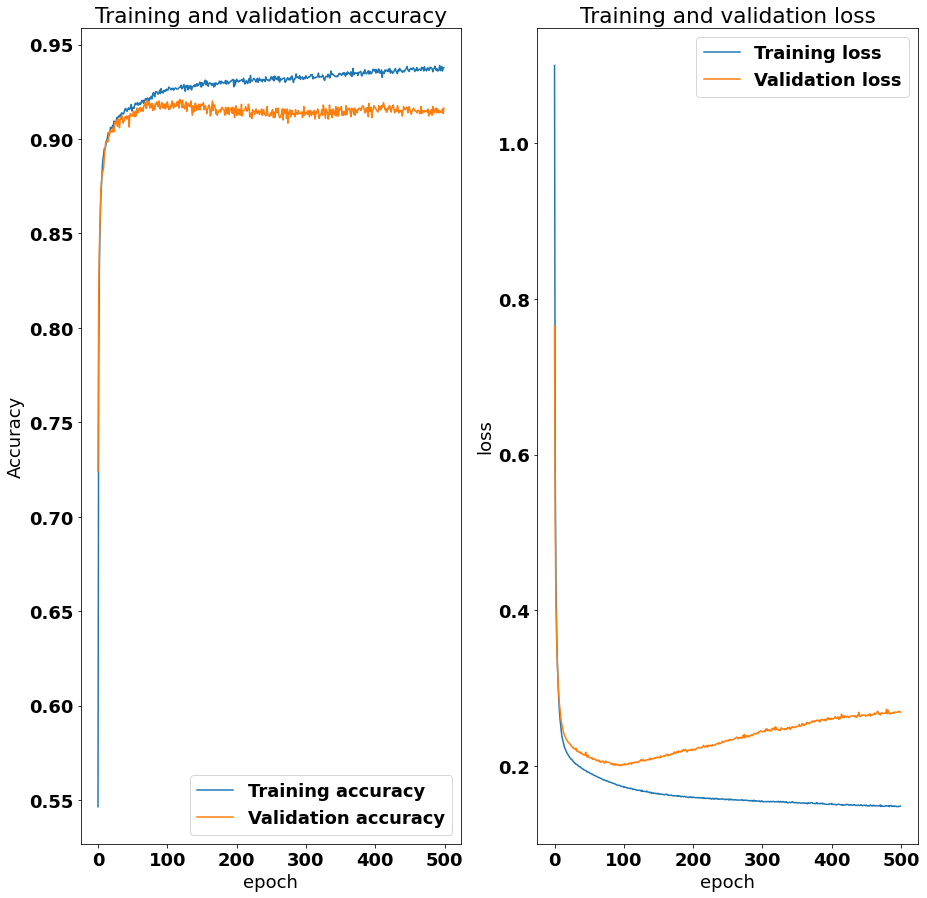

In [ ]:
image = cv2.imread('7.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

95th epoch ---> 91.7%

## Model 8: one hidden layer with 16 neurons and batch_size=200

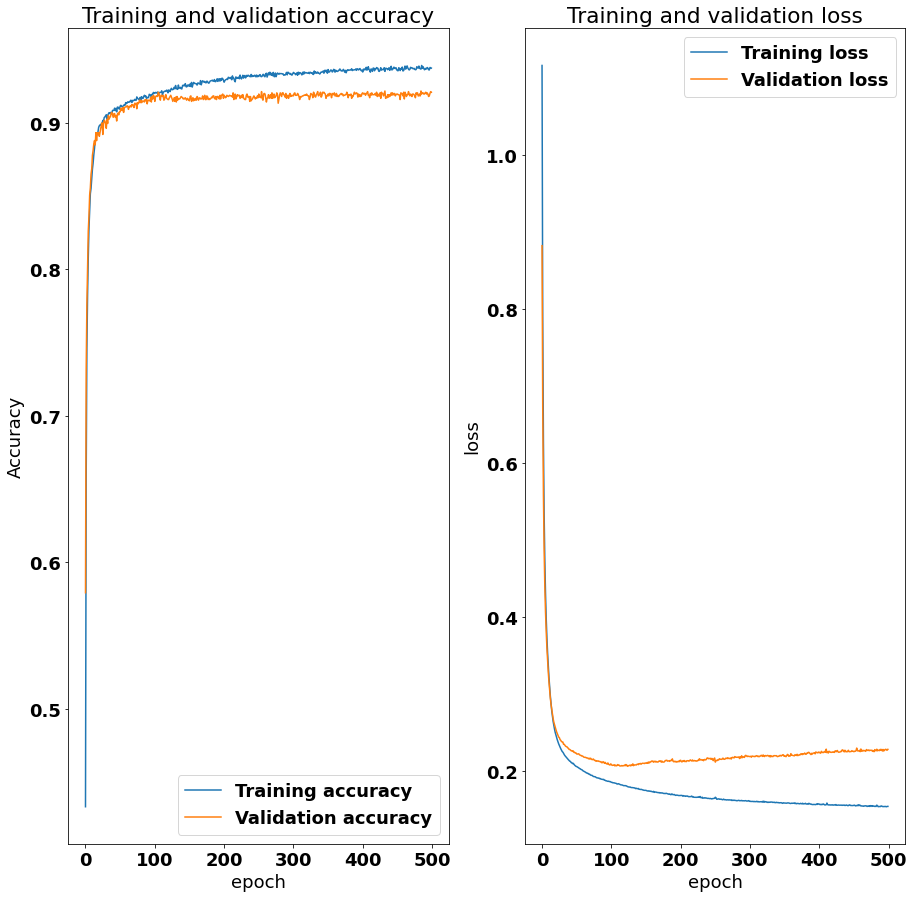

In [ ]:
image = cv2.imread('8.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

100th epoch ---> 91.8%

## Model 9: one hidden layer with 32 neurons 

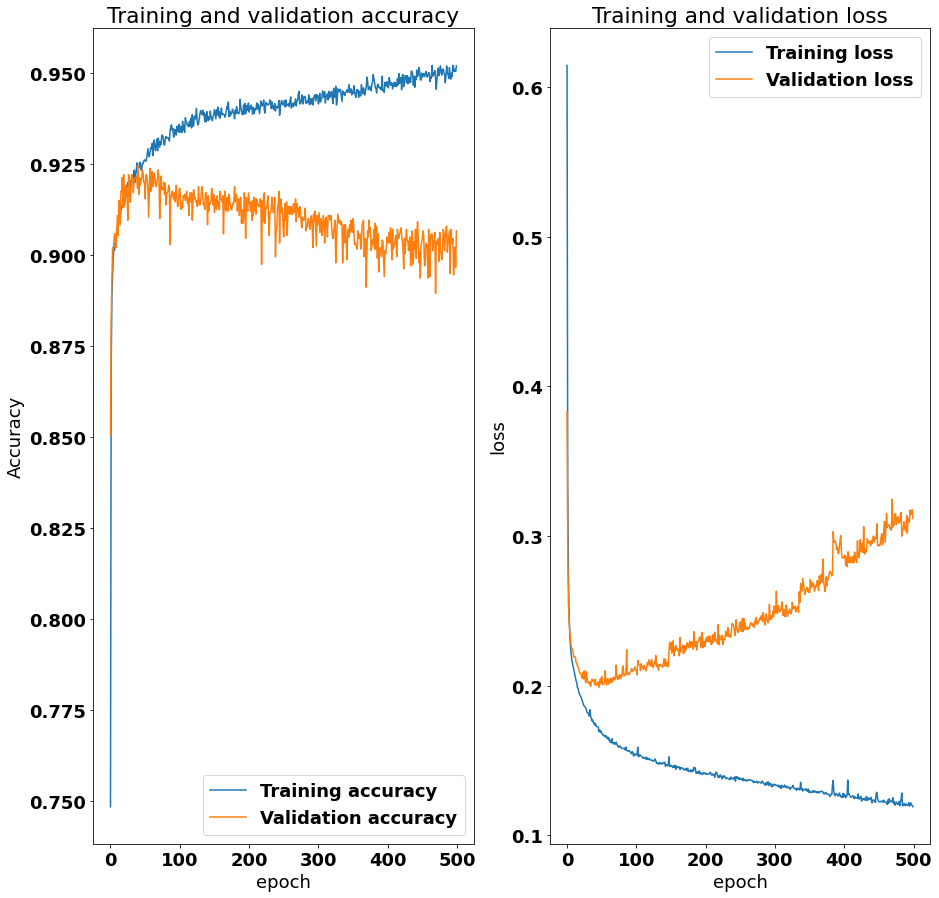

In [ ]:
image = cv2.imread('9.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

61th epoch ---> 92.3%

## Model 10: one hidden layer with 32 neurons and batch_size=50

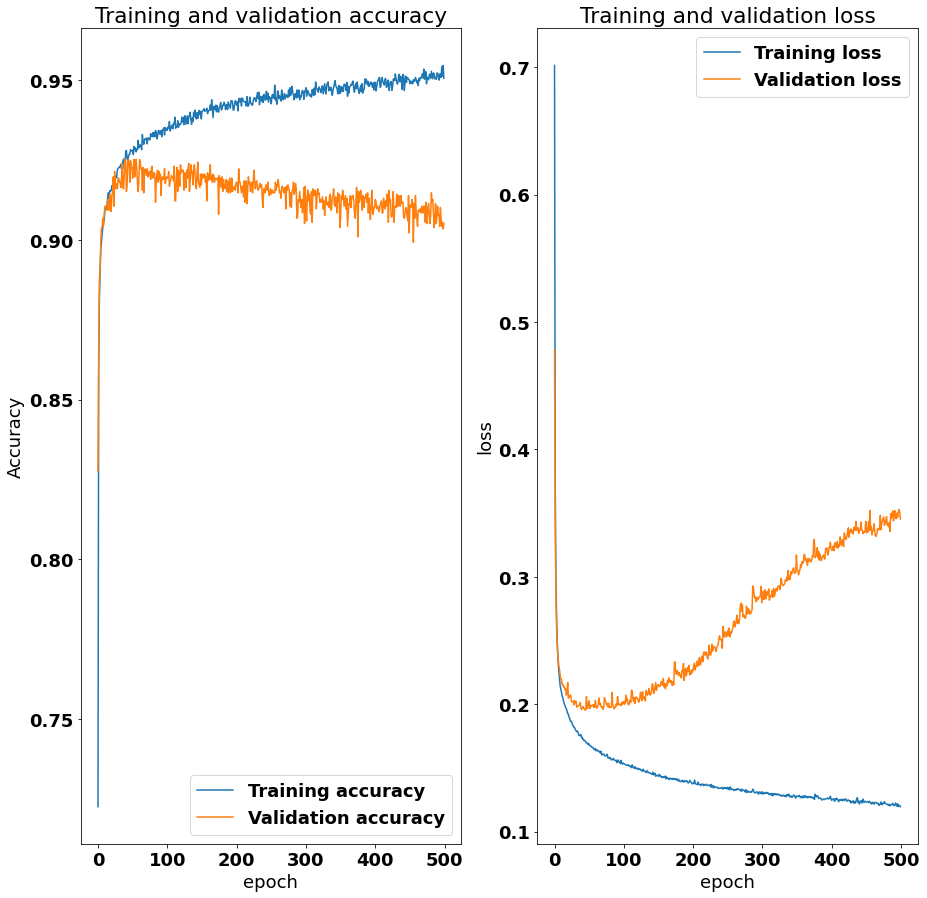

In [ ]:
image = cv2.imread('10.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

69th epoch ---> 92.2%

## Model 11: one hidden layer with 32 neurons and batch_size=100

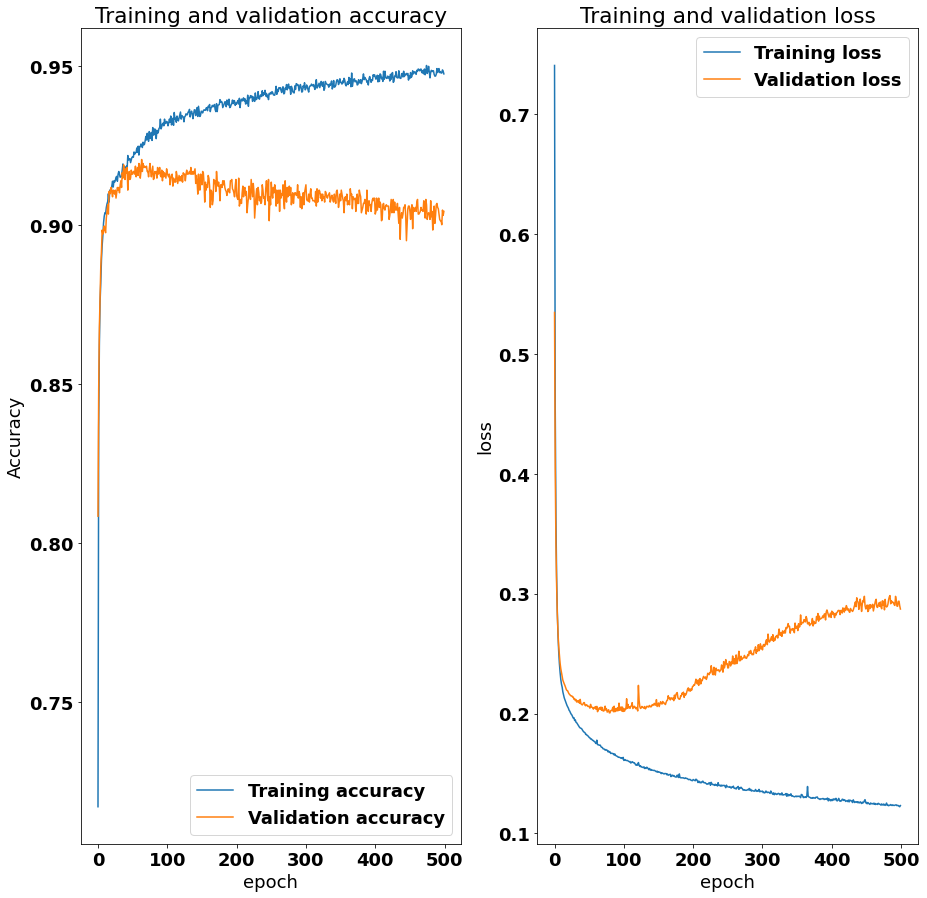

In [ ]:
image = cv2.imread('11.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

80th epoch ---> 91.8%

## Model 12: one hidden layer with 32 neurons and batch_size=200

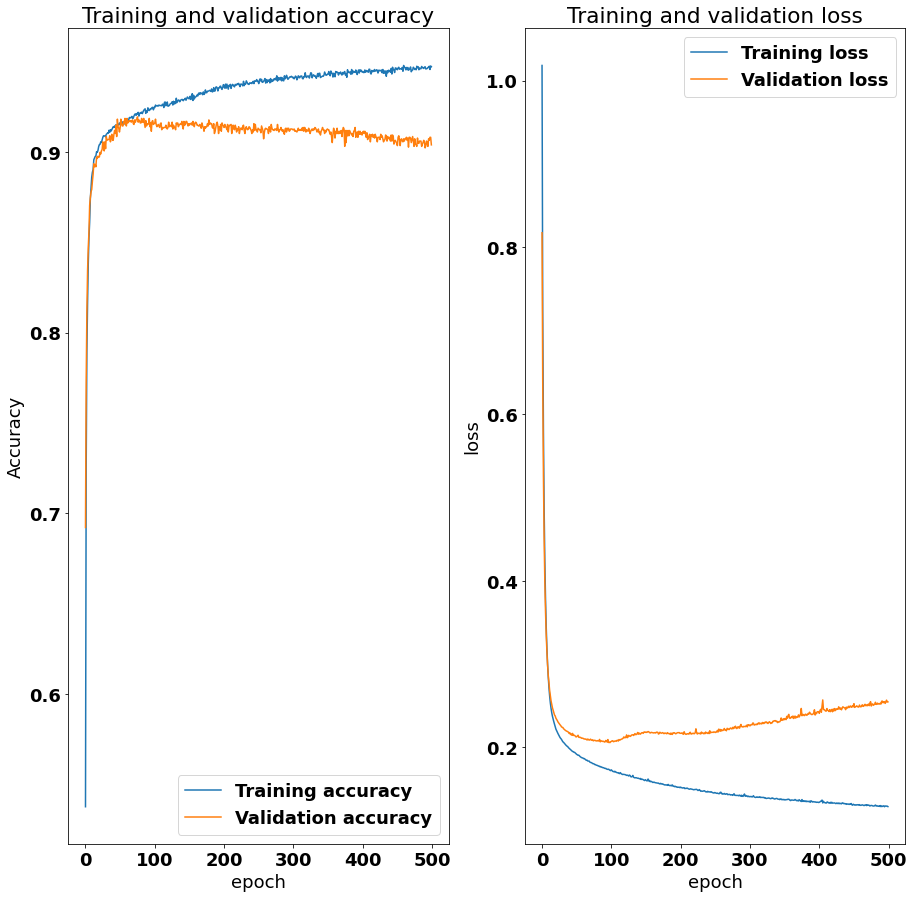

In [ ]:
image = cv2.imread('12.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

95th epoch ---> 91.6%

## Model 13: one hidden layer with 64 neurons 

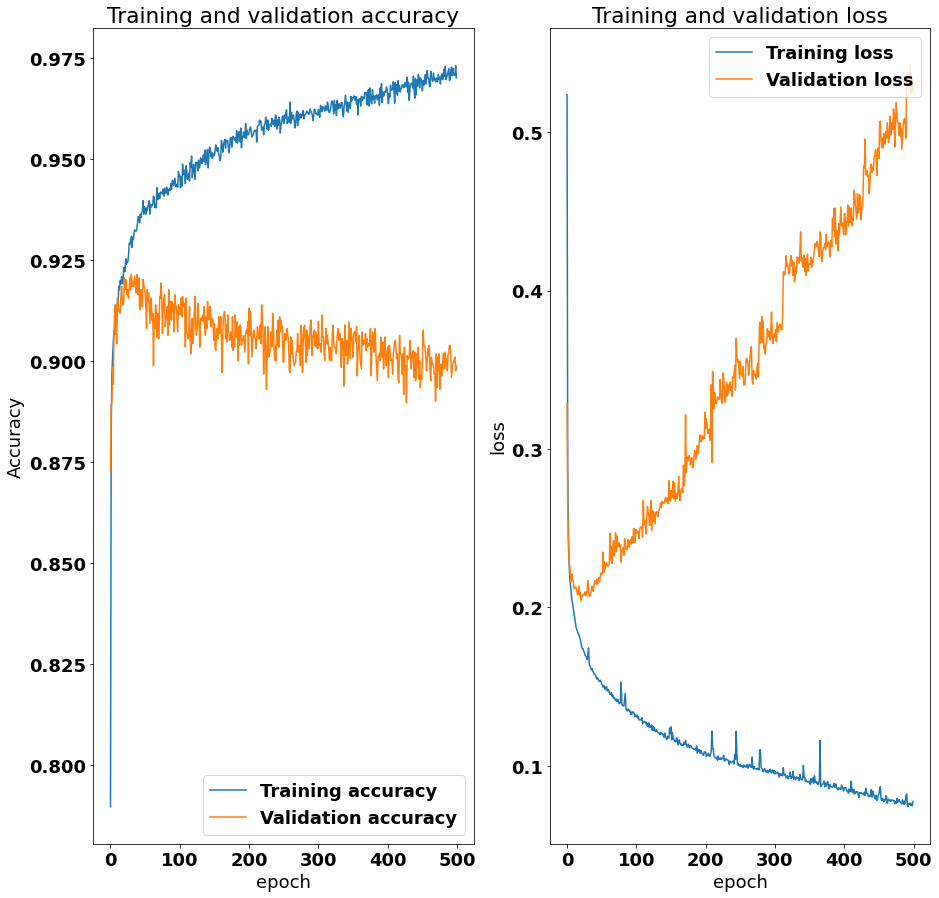

In [ ]:
image = cv2.imread('13.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

48th epoch ---> 92%

## Model 14: one hidden layer with 64 neurons and batch_size=50

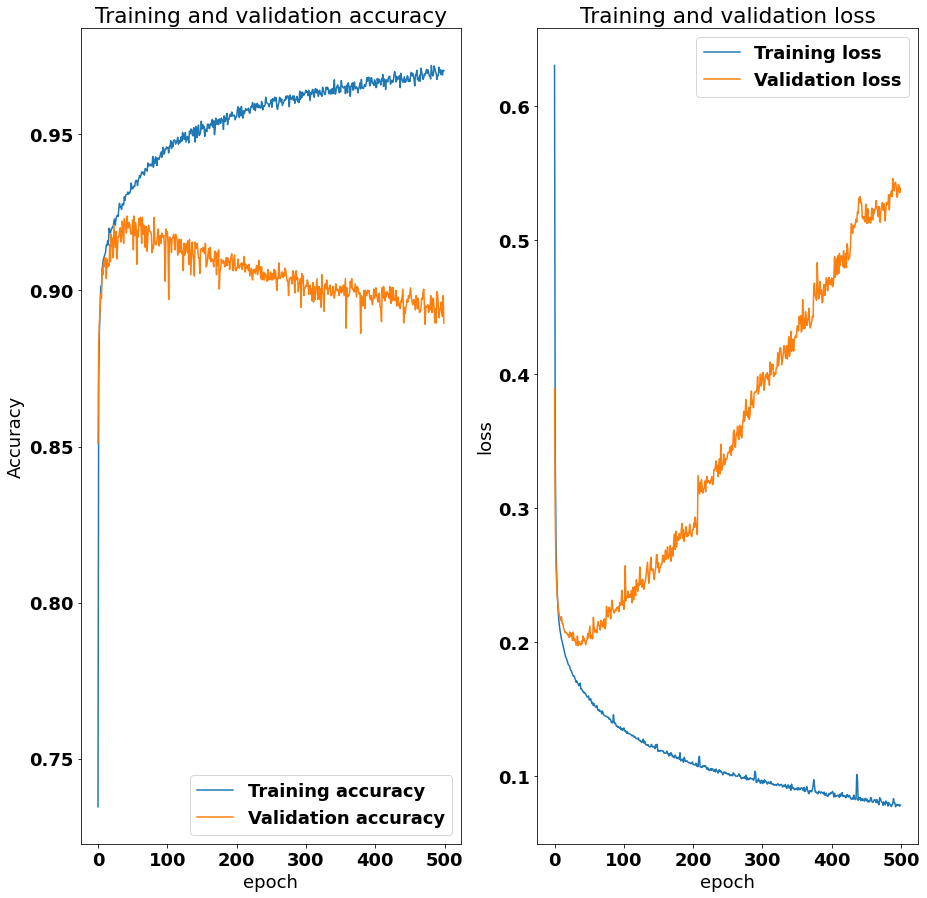

In [ ]:
image = cv2.imread('14.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

46th epoch ---> 92.2%

## Model 15: one hidden layer with 64 neurons and batch_size=100

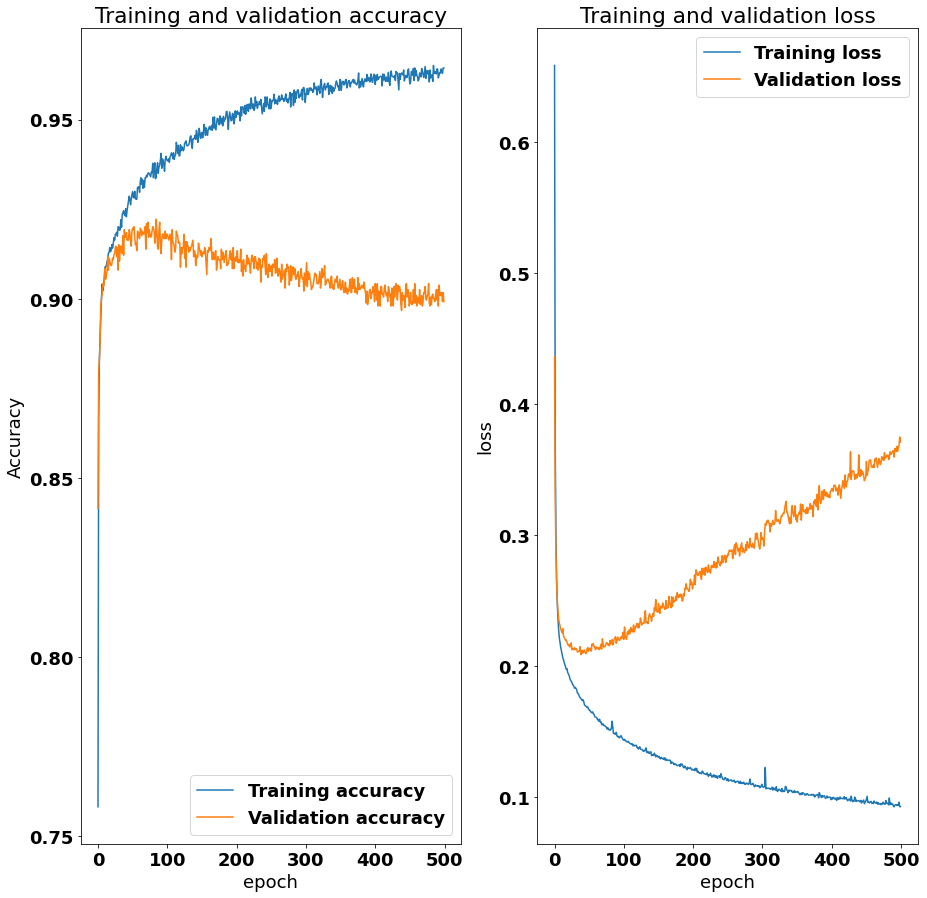

In [ ]:
image = cv2.imread('15.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

39th epoch ---> 91.9%

## Model 16: one hidden layer with 64 neurons and batch_size=200

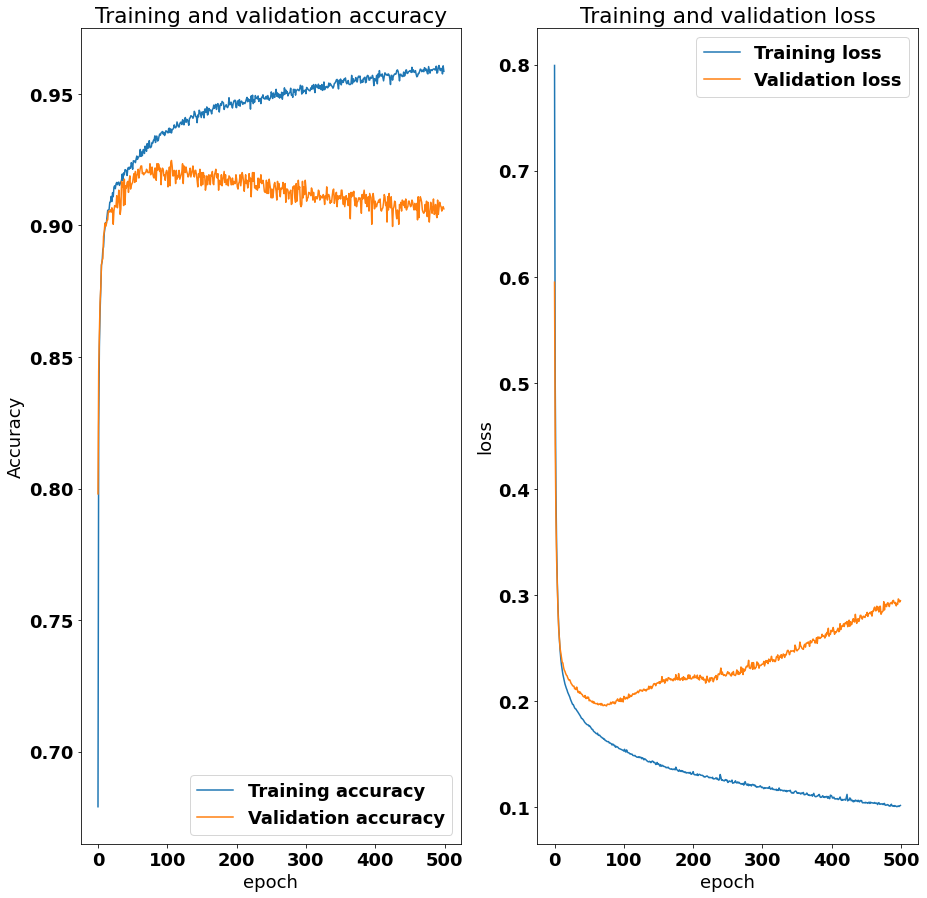

In [ ]:
image = cv2.imread('16.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

88th epoch ---> 92.3%

## Model 17: There are two hidden layers, each with 10 neurons 

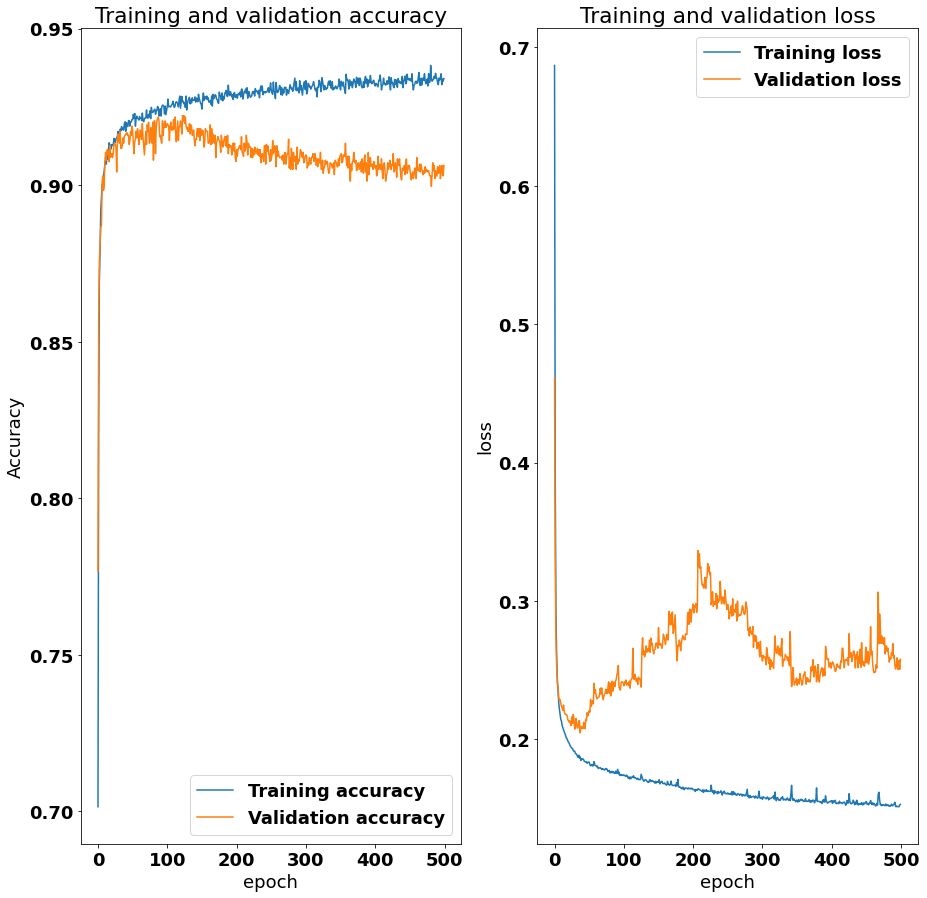

In [ ]:
image = cv2.imread('17.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

38th epoch ---> 91.3%

## Model 18: There are two hidden layers, each with 16 neurons 

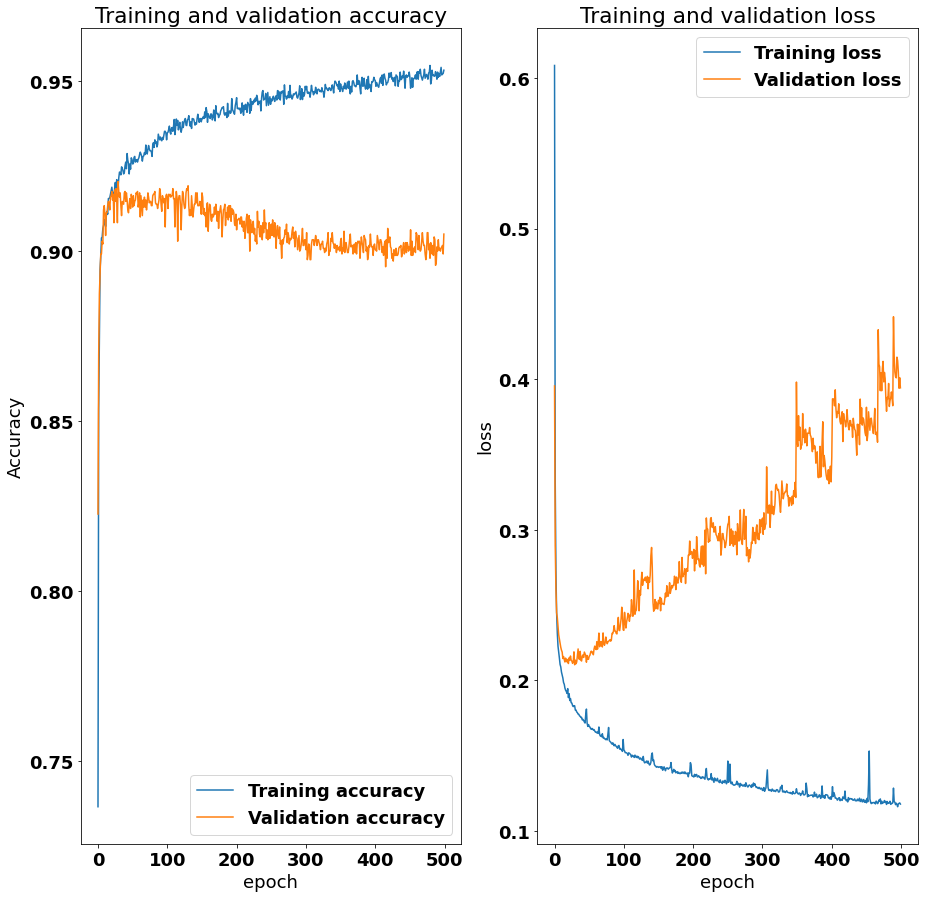

In [ ]:
image = cv2.imread('18.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

30th epoch ---> 92.1%

## Model 19: There are two hidden layers, each with 32 neurons 

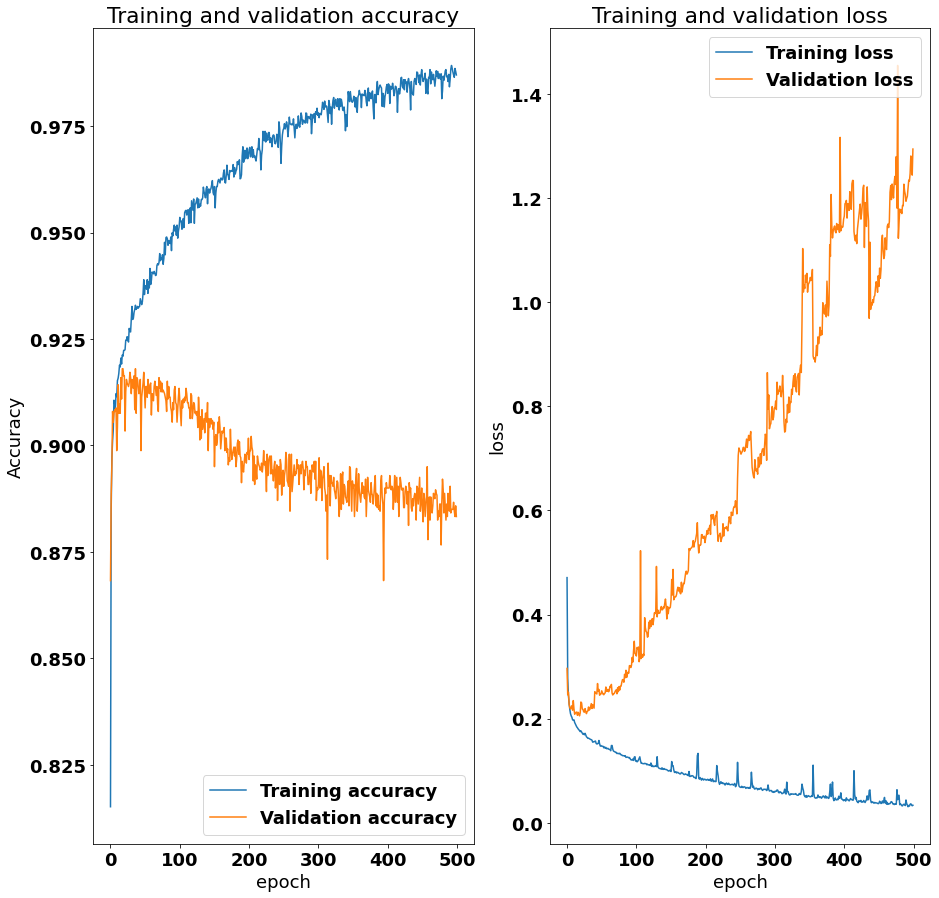

In [ ]:
image = cv2.imread('19.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

29th epoch ---> 91.7%

## Model 20: There are two hidden layers, each with 64 neurons 

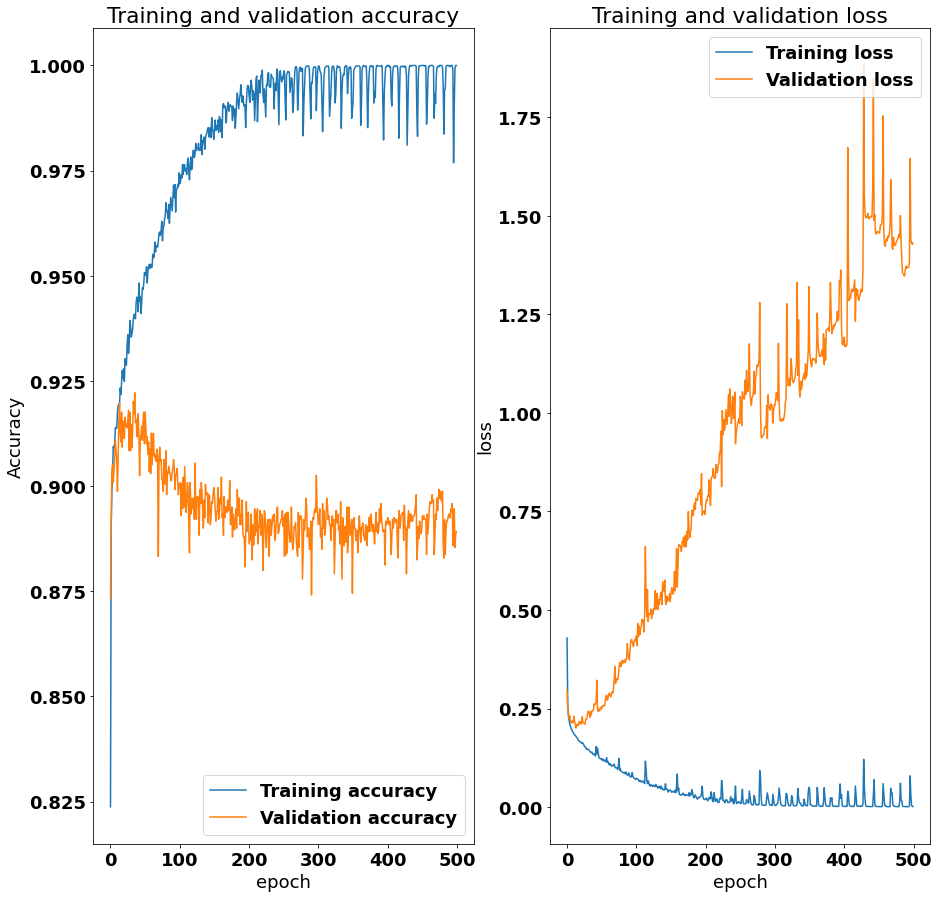

In [ ]:
image = cv2.imread('20.png',  cv2.IMREAD_UNCHANGED)
cv2_imshow(image) 

14th epoch ---> 92%

# Final words

Comparing 20 neural network models, I found that there is only a very slight difference in accuracy, which is 92%, but they have their own characteristics in terms of loss graphs. The validation loss graph for model 4 shows a slight reduction in the 200th epoch, sometimes it is better to check higher epochs to see if there is another local minimum. In model 17, for example, there are two local minimums. The first one is around the 38th epoch, while the second is around the 350th epoch, although the first one has higher accuracy.
As layers and neurons are raised after local minima, the shapes of validation loss are extremely ascending and jagged, which is a sign of overfitting.